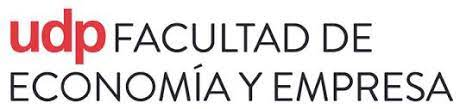



# UDP - Bussines Analytics 1

### Contenido de la clase:

### Data Processing

### Contenido de la clase
* Creación de Variables Dummies
* One Hot Encoding
* Label Encoding
* Target Encoding
* Ejemplo práctico

## Hacia donde vamos...
* Analítica Descriptiva:
  * Preprocessing
    * Missing Values
    * Outliers
    * Feature Engineering
    * Feature Selection
  * Exploratory Data Analysis
    * Análisis Univariado: distribución normal?
    * Test de comparación de médias: t-test, Chi2, KS, etc
    * Regresión Logística

### Instalación de la librería de estadísticas

In [253]:
# Para instalarla debes sacar el signo #
# ! pip install scipy

In [254]:
# Librerías de tratamiento de datos (las principales)
import pandas as pd
import numpy as np
import missingno as msno


# Librerías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns
# complementa algunas visualizaciones
%matplotlib inline
# apply some cool styling
sns.set(color_codes=True)

# Instalación de librería estadística
from scipy import stats
from scipy.stats import norm


# Librerías de advertencias
import warnings
warnings.filterwarnings("ignore")


### Importamos la data desde nuestro Drive

1. from google.colab import drive
2. drive.mount("/content/drive")
3. Permitir acceso a nuestro Google Colab
4. link archivo


In [255]:
# from google.colab import drive
# drive.mount("/content/drive")
# df = pd.read_csv("/content/drive/MyDrive/UDP_BA01/data_store.csv",sep=",",encoding="latin-1")

# # To display the top 5 rows
# df.head(5)

In [256]:
# Data Local
df = pd.read_csv("/Users/franciscoletelier/Dropbox (Personal)/UDP/UDP_BA/data_store.csv",sep=",",encoding="latin-1")
df.sample(10)



# Data desde Github
# df = pd.read_csv("data_store.csv",sep=",",encoding="latin-1")
# df.sample(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3017,3018,US-2016-160528,8/23/2016,8/30/2016,Standard Class,MH-18115,Mick Hernandez,Home Office,United States,Pharr,...,78577,Central,FUR-FU-10004973,Furniture,Furnishings,Flat Face Poster Frame,22.608,3,0.6,-10.1736
5053,5054,CA-2015-141243,1/3/2015,1/8/2015,Second Class,AH-10465,Amy Hunt,Consumer,United States,Dallas,...,75217,Central,TEC-AC-10003198,Technology,Accessories,Enermax Acrylux Wireless Keyboard,398.400,5,0.2,84.6600
8003,8004,CA-2014-143210,12/1/2014,12/3/2014,First Class,AA-10645,Anna Andreadi,Consumer,United States,Lowell,...,1852,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.900,2,0.0,78.8510
6556,6557,CA-2014-137092,10/20/2014,10/22/2014,Second Class,LS-16975,Lindsay Shagiari,Home Office,United States,Chicago,...,60653,Central,OFF-BI-10000632,Office Supplies,Binders,Satellite Sectional Post Binders,8.682,1,0.8,-14.7594
5571,5572,CA-2014-151162,12/5/2014,12/9/2014,Standard Class,EA-14035,Erin Ashbrook,Corporate,United States,Columbus,...,43229,East,OFF-PA-10001033,Office Supplies,Paper,Xerox 1893,98.376,3,0.2,35.6613
6997,6998,CA-2017-117443,12/23/2017,12/25/2017,Second Class,JB-15400,Jennifer Braxton,Corporate,United States,Rockford,...,61107,Central,OFF-PA-10004475,Office Supplies,Paper,Xerox 1940,175.872,4,0.2,63.7536
7420,7421,US-2016-114013,3/13/2016,3/15/2016,Second Class,SC-20770,Stewart Carmichael,Corporate,United States,Philadelphia,...,19134,East,OFF-BI-10002353,Office Supplies,Binders,GBC VeloBind Cover Sets,23.160,5,0.7,-15.4400
8511,8512,CA-2016-103359,12/22/2016,12/26/2016,Standard Class,LC-16885,Lena Creighton,Consumer,United States,New York City,...,10035,East,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",25.584,2,0.2,8.9544
8425,8426,CA-2016-137652,8/28/2016,8/30/2016,First Class,EB-13750,Edward Becker,Corporate,United States,Cincinnati,...,45231,East,OFF-BI-10004099,Office Supplies,Binders,GBC VeloBinder Strips,18.432,8,0.7,-12.2880
7683,7684,CA-2015-120782,4/28/2015,5/1/2015,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,...,48640,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.4850


# Prepocesamiento de la data
## Variable Objetivo: Profit

### Eliminación de columnas innecesarías

In [257]:
# Se eliminan las columnas que no se usarán (drop)
df = df.drop(['Customer ID','Customer Name', 'Order ID', 'Country', 'Postal Code', 'Product ID'],axis=1)
df.head(5)

,Row ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,6/12/2016,6/16/2016,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<AxesSubplot: >

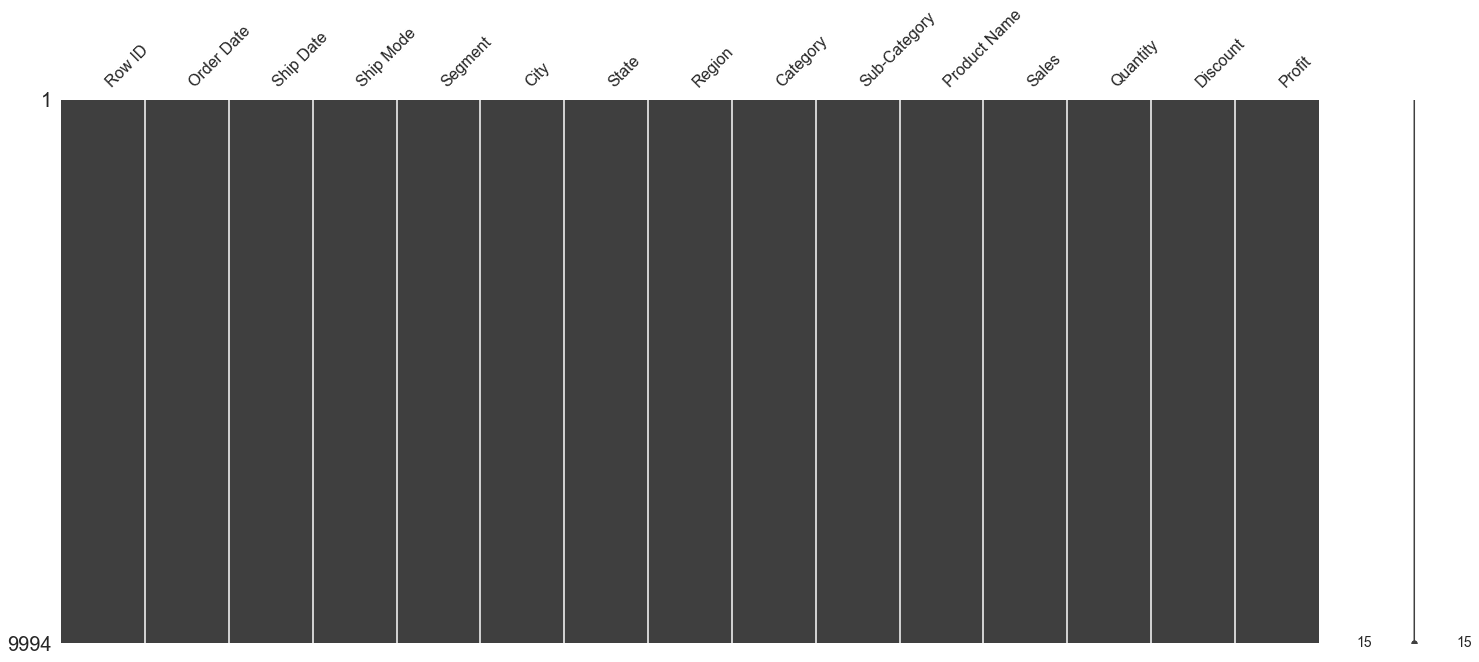

In [258]:
msno.matrix(df)

# Creación de Variables Dummy

### Creación de variables dummy para la variable categorica: Ship Mode

In [259]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [260]:
# Simplificamos las respuestas de la columna Ship Mode
df['Ship Mode'] = df['Ship Mode'].replace(['Standard Class','Second Class','First Class','Same Day'],['Standard','Second','First','Express'])

In [261]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [262]:
# Simplificamos las respuestas de la columna Segment
df['Segment'] = df['Segment'].replace(['Consumer','Corporate','Home Office'],['Consumidor','Corporativo','Oficina'])

### Creamun subset de trabajo para los ejemplos

In [263]:
subset = df[['Ship Mode','Segment','Profit']]
subset.head(5)

,Ship Mode,Segment,Profit
0,Second,Consumidor,41.9136
1,Second,Consumidor,219.5820
2,Second,Corporativo,6.8714
3,Standard,Consumidor,-383.0310
4,Standard,Consumidor,2.5164


### One Hot Encoding

* One Hot Encoding es un proceso mediante el cual se crea una variable dummy por cada categoría de la variable categórica.
* Es decir, si tenemos una variable categórica con 3 categorías, se crearán 3 variables dummy.
* La variable dummy toma el valor de 1 si la observación pertenece a esa categoría, y 0 si no pertenece a esa categoría.
* Es importante eliminar una de las variables dummy creadas, ya que si no se hace, se puede caer en el problema de multicolinealidad.
* Consultar la librería de pandas para crear variables dummy: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
* Consultar la librería de sklearn para crear variables dummy: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [264]:
# Desarrollaremos el ejemplo con la columna Ship Mode con la librería Pandas: pandas.get_dummies()

# Se crea una nueva columna para cada valor de la columna Ship Mode
tmp_dummy = pd.get_dummies(subset['Ship Mode'])

tmp_dummy.head(5)

,Express,First,Second,Standard
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1


In [265]:
# Se agrega la columna Ship Mode al dataframe
subset = pd.concat([subset,tmp_dummy],axis=1)

subset.head(5)


,Ship Mode,Segment,Profit,Express,First,Second,Standard
0,Second,Consumidor,41.9136,0,0,1,0
1,Second,Consumidor,219.5820,0,0,1,0
2,Second,Corporativo,6.8714,0,0,1,0
3,Standard,Consumidor,-383.0310,0,0,0,1
4,Standard,Consumidor,2.5164,0,0,0,1


### Para evitar multicolinealidad, debemos dropear la columna de referencia

In [266]:
# Eliminamos la columna Ship Mode
subset = subset.drop(['Ship Mode'],axis=1)
subset.head(5)

,Segment,Profit,Express,First,Second,Standard
0,Consumidor,41.9136,0,0,1,0
1,Consumidor,219.5820,0,0,1,0
2,Corporativo,6.8714,0,0,1,0
3,Consumidor,-383.0310,0,0,0,1
4,Consumidor,2.5164,0,0,0,1


### Desarrollaremos el ejemplo con la columna Segment con la librería Sklearn: sklearn.preprocessing.OneHotEncoder()

In [267]:
# Se importa la librería
from sklearn.preprocessing import OneHotEncoder

In [268]:
subset.Segment.unique()

array(['Consumidor', 'Corporativo', 'Oficina'], dtype=object)

In [269]:
# Se crea el objeto
ohe = OneHotEncoder()

# Se aplica el objeto a la columna Segment
tmp_ohe = pd.DataFrame(ohe.fit_transform(subset[['Segment']]).toarray()) # .astype(int)

# Se agrega el nombre de las columnas
tmp_ohe.columns = ['Consumidor', 'Corporativo', 'Oficina']

tmp_ohe.head(5)


,Consumidor,Corporativo,Oficina
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [270]:
# Se agrega la columna tmp_ohe al dataframe
subset = pd.concat([subset,tmp_ohe],axis=1)
subset.head(5)

,Segment,Profit,Express,First,Second,Standard,Consumidor,Corporativo,Oficina
0,Consumidor,41.9136,0,0,1,0,1.0,0.0,0.0
1,Consumidor,219.5820,0,0,1,0,1.0,0.0,0.0
2,Corporativo,6.8714,0,0,1,0,0.0,1.0,0.0
3,Consumidor,-383.0310,0,0,0,1,1.0,0.0,0.0
4,Consumidor,2.5164,0,0,0,1,1.0,0.0,0.0


In [271]:
# Se eliminan las columnas que no se usarán (drop)
subset = subset.drop(['Segment'],axis=1)
subset.head(5)

,Profit,Express,First,Second,Standard,Consumidor,Corporativo,Oficina
0,41.9136,0,0,1,0,1.0,0.0,0.0
1,219.5820,0,0,1,0,1.0,0.0,0.0
2,6.8714,0,0,1,0,0.0,1.0,0.0
3,-383.0310,0,0,0,1,1.0,0.0,0.0
4,2.5164,0,0,0,1,1.0,0.0,0.0


# Crearemos una variable categórica para clasificar la variable Profit en 2 categorías
* Profit > 0: 1
* Profit <= 0: 0

In [272]:
# Se crea la variable categorica para la columna Profit con las siguientes condiciones
# Profit > 0 : Ganancia
# Profit <= 0 : Perdida

subset['Profit_cat'] = np.where(subset['Profit'] > 0, 'Ganancia', 'Perdida')
subset.head(5)

,Profit,Express,First,Second,Standard,Consumidor,Corporativo,Oficina,Profit_cat
0,41.9136,0,0,1,0,1.0,0.0,0.0,Ganancia
1,219.5820,0,0,1,0,1.0,0.0,0.0,Ganancia
2,6.8714,0,0,1,0,0.0,1.0,0.0,Ganancia
3,-383.0310,0,0,0,1,1.0,0.0,0.0,Perdida
4,2.5164,0,0,0,1,1.0,0.0,0.0,Ganancia


In [273]:
# Se dropea la columna Profit para no tenerla duplicada
subset = subset.drop(['Profit'],axis=1)
subset.head(5)

,Express,First,Second,Standard,Consumidor,Corporativo,Oficina,Profit_cat
0,0,0,1,0,1.0,0.0,0.0,Ganancia
1,0,0,1,0,1.0,0.0,0.0,Ganancia
2,0,0,1,0,0.0,1.0,0.0,Ganancia
3,0,0,0,1,1.0,0.0,0.0,Perdida
4,0,0,0,1,1.0,0.0,0.0,Ganancia


# Label Encoding
* Label Encoding es un proceso mediante el cual se asigna un número a cada categoría de la variable categórica.
* Es decir, si tenemos una variable categórica con 3 categorías, se asignarán los números 1, 2 y 3 a cada categoría.
* Es importante tener en cuenta que no se debe usar Label Encoding cuando se trabaja con algoritmos de Machine Learning basados en distancias, como KNN o K-Means.
* Consultar la librería de pandas para crear variables dummy: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
* Consultar la librería de sklearn para crear variables dummy: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [274]:
subset.describe()

,Express,First,Second,Standard,Consumidor,Corporativo,Oficina
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,0.054333,0.153892,0.194617,0.597158,0.519412,0.302181,0.178407
std,0.226684,0.360864,0.395925,0.490494,0.499648,0.459226,0.382874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [275]:
# Aplicamos label encoder a la columna Profit_cat
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
subset['Profit_cat'] = le.fit_transform(subset['Profit_cat'])
subset.head(5)

,Express,First,Second,Standard,Consumidor,Corporativo,Oficina,Profit_cat
0,0,0,1,0,1.0,0.0,0.0,0
1,0,0,1,0,1.0,0.0,0.0,0
2,0,0,1,0,0.0,1.0,0.0,0
3,0,0,0,1,1.0,0.0,0.0,1
4,0,0,0,1,1.0,0.0,0.0,0


In [276]:
# Se transforma las columnas a tipo int
subset = subset.astype(int)
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Express      9994 non-null   int64
 1   First        9994 non-null   int64
 2   Second       9994 non-null   int64
 3   Standard     9994 non-null   int64
 4   Consumidor   9994 non-null   int64
 5   Corporativo  9994 non-null   int64
 6   Oficina      9994 non-null   int64
 7   Profit_cat   9994 non-null   int64
dtypes: int64(8)
memory usage: 624.8 KB


# Aplicamos nuestras transformaciones a la data en una regresión logística

In [277]:
# Aplicamos una regresión logistica para predecir el valor de la columna Profit_cat
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report, roc_curve, roc_auc_score


In [278]:
X = subset.drop('Profit_cat', axis=1).values  # Features (todas las columnas excepto la variable objetivo)
y = subset['Profit_cat'].values  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [279]:
# Vamos a conservar los nombres de las columnas para luego poder identificar los coeficientes
X_columns = pd.DataFrame(subset.drop('Profit_cat', axis=1).columns)
X_columns

,0
0,Express
1,First
2,Second
3,Standard
4,Consumidor
5,Corporativo
6,Oficina


## Estandarizamos la data
* Usamos sklearn.preprocessing.StandardScaler ()
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* La estandarización es un proceso que se realiza sobre la data numérica.
* La estandarización es un proceso mediante el cual se transforma la data para que tenga media 0 y desviación estándar 1.

La fórmula es la siguiente:
$z = (x - u)\over s$

Donde:
* $z$: valor estandarizado
* $x$: valor original
* $u$: media
* $s$: desviación estándar


* Si necesitan escribir ecuaciones en markdown, pueden usar este sitio: https://www.codecogs.com/latex/eqneditor.php

In [280]:
from sklearn.preprocessing import StandardScaler
standard_x = StandardScaler()
X_train = standard_x.fit_transform(X_train)
X_test = standard_x.fit_transform(X_test)

In [281]:
# Se crea el objeto
logmodel = LogisticRegression(random_state=0) #Podemos usar distintos solver='lbfgs' como ejemplo

# Se entrena el modelo
modelo = logmodel.fit(X_train,y_train)


In [282]:
# Se realizan las predicciones
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [283]:
# Se extraen las probabilidades del conjuto de test
y_proba = logmodel.predict_proba(X_test)[:,1] # Se extrae la probabilidad en un array de 1 columna
y_proba.shape

(2999,)

In [284]:
# Podemos revisar manualmente las predicciones
# Comparar las predicciones con los valores reales
# predictions[0:10], y_test[0:10]

## Extrayendo información del modelo

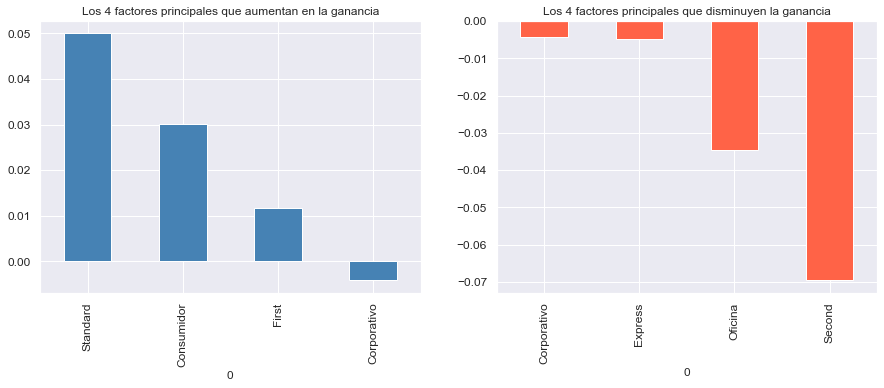

In [285]:
# Veamos el peso de cada variable en el modelo
weights = pd.Series(modelo.coef_[0], index=X_columns[0])  # Hay que guardarlo como serie de pandas para poder graficarlo

fig,axs = plt.subplots(1,2,figsize=(15,5))
#plt.subplots_adjust(wspace=0.5)
weights.sort_values(ascending=False).head(4).plot(kind='bar',ax=axs[0],
                                                  title='Los 4 factores principales que aumentan en la ganancia',color='steelblue',
                                                  fontsize=12)
weights.sort_values(ascending=False).tail(4).plot(kind='bar',ax=axs[1],
                                                  title='Los 4 factores principales que disminuyen la ganancia',color='tomato',
                                                  fontsize=12);